# Data Analysis Project

### Goals:

In the current notebook, a project analyzing marketing data is performed. The goals of the project are the following:
* Get acquainted with the data
* Clean the data and prepare it for analysis
* Set the questions to answers with the analysis.
* Analyze variables within the data to unrevel patterns and insights on these questions

### Data

The data used in the project has been obtained from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

### Loading libraries
Prior to analyisis, import of necessary Python libraries is performed.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
marketing_data = pd.read_csv("marketing_data.csv")

### Preliminar Exploration

In the following, a preliminar exploration of the marketing data CSV is perferomed, including examination of the number of rows and columns, duplicates, null values and types.

In [5]:
marketing_data.head(10)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [6]:
#Duplicates
duplicates = marketing_data.duplicated()
print(duplicates.value_counts())

False    2240
dtype: int64


In [7]:
#Missing data
print(marketing_data.isnull().sum())
print(marketing_data.info())

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   

In [8]:
#Statistical info
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

### Data Insights

After inspection of the data, various points can be extracted:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data (24 missing values), it is string type, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.

### Data Cleaning



The ` Income` column required some cleaning, including renaming of the column name and setting it ready for numerical analysis. 

In [9]:
#Rename ` income` column
marketing_data.rename(columns = {' Income':'Income'}, inplace = True)
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
#Remove $ sign and change its type to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
#Check the new column
marketing_data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Once the `Income` column is ready, we can inspect it to see how the distribution of values look like. Values are distributed around 0 and 200000. Nevertheless, there is a mayor outlier above 600000. 

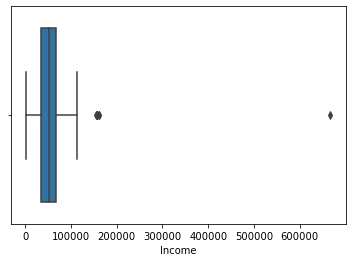

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure()
sns.boxplot(marketing_data.Income)
plt.show()
plt.clf()

Next, removal of the outlier and replace of missing values with the mean is performed.

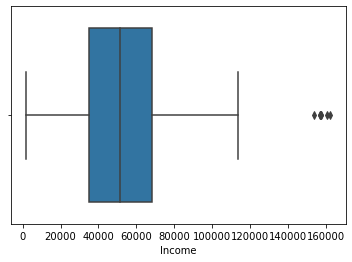

<Figure size 432x288 with 0 Axes>

In [13]:
#Removal of the rightmost outlier
marketing_data = marketing_data[marketing_data.Income < 300000]

plt.figure()
sns.boxplot(marketing_data.Income)
plt.show()
plt.clf()

In [14]:
#Replace missing values with the mean
marketing_data.Income = marketing_data.Income.fillna(marketing_data.Income.mean())

print(marketing_data.Income.isnull().sum())

0


### Adding an 'Age' column

It is convinient to add an `Age` column so it is easier to work with the data. There are various outliers of age higher than 120 years, so they have to be removed.

In [15]:
marketing_data['Age'] = 2022 - marketing_data['YearBirth'] 

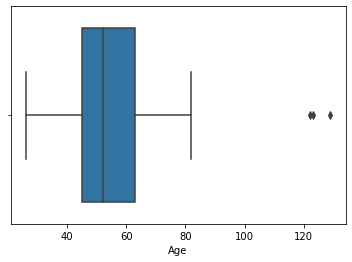

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure()
sns.boxplot(marketing_data.Age)
plt.show()
plt.clf()

In [17]:
marketing_data = marketing_data[marketing_data.Age < 100]

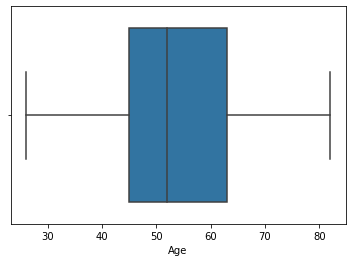

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure()
sns.boxplot(marketing_data.Age)
plt.show()
plt.clf()

In [19]:
marketing_data.Age.describe()

count    2212.000000
mean       53.086347
std        11.701599
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

### Checking 'Education' Variable

Exploration of the `Education` variable shows that there are no outliers, so no further cleaning should be performed.

In [20]:
marketing_data.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

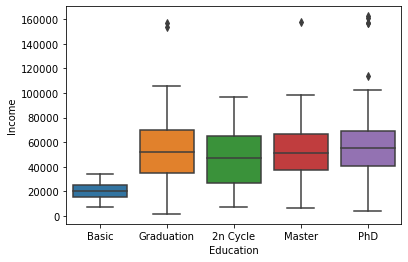

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure()
sns.boxplot(x = marketing_data["Education"], y=marketing_data["Income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()
plt.clf()

### Exploratory Data Analysis

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

### Big Picture

First, a general view at the data is performed through a series os histograms. The dependent variables have a right skewed distribution, with most of the values on the left side of the graph.

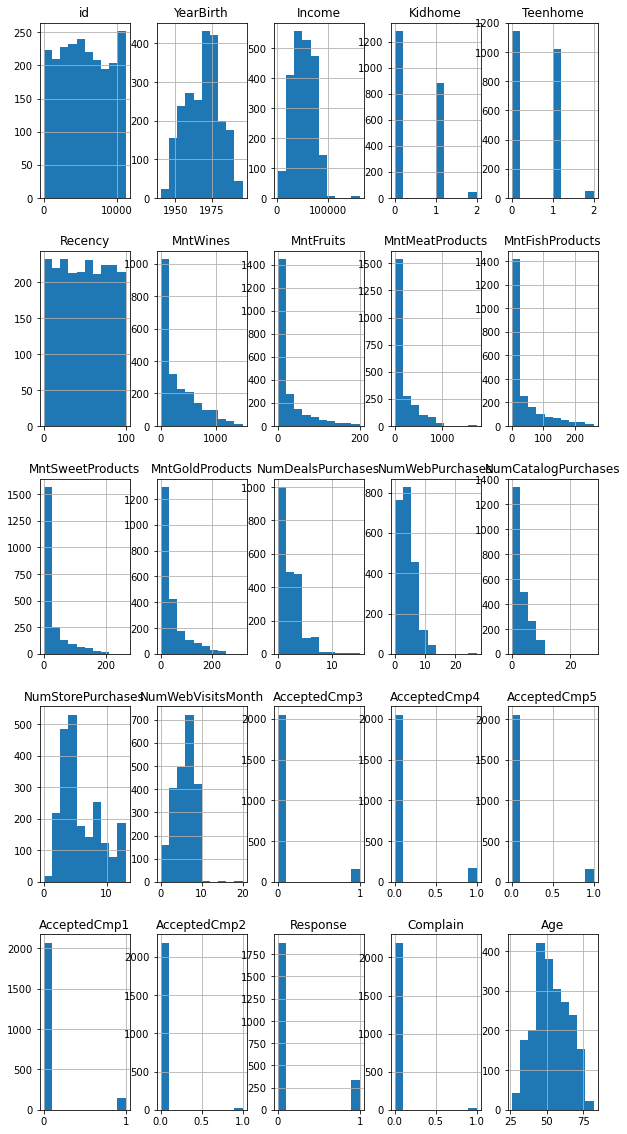

In [22]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

Next, a table and a matrix with the correlation bewtween variables is shown. High correlation is associated with values close to 1/-1. Among all the different variables taken into account, `income` seems to be the one with the highest correlation.

In [23]:
marketing_data.corr()

,id,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,...,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
YearBirth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,...,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
Income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,...,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
Kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,...,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
Teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,...,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
Recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,...,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
MntWines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,...,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
MntFruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,...,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
MntMeatProducts,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,...,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
MntFishProducts,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,...,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


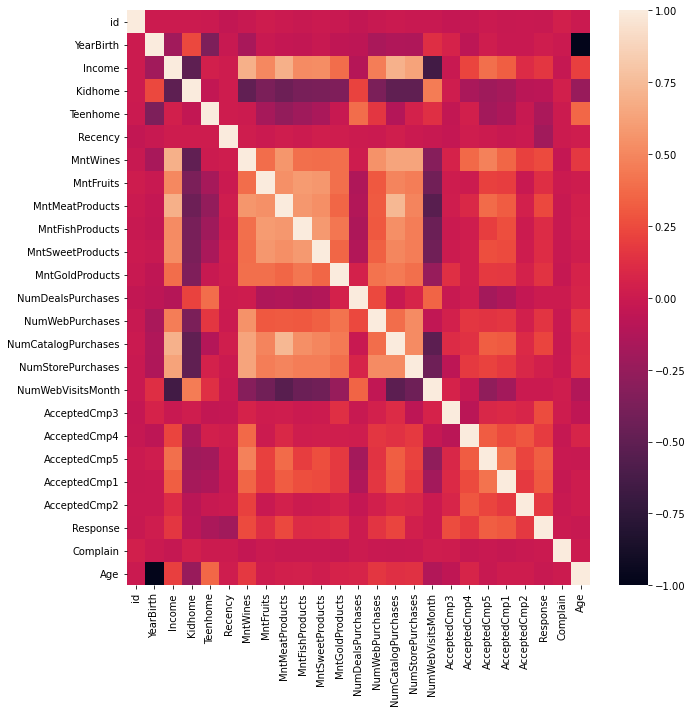

In [24]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Next, the relationship bewteen `Income` and each `Num{type}Purchases` variable is shown. The `hue` parameter with the `Education` variable is used to see if there are any patterns that can be deciphered between `Education` and `Num{type}Purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

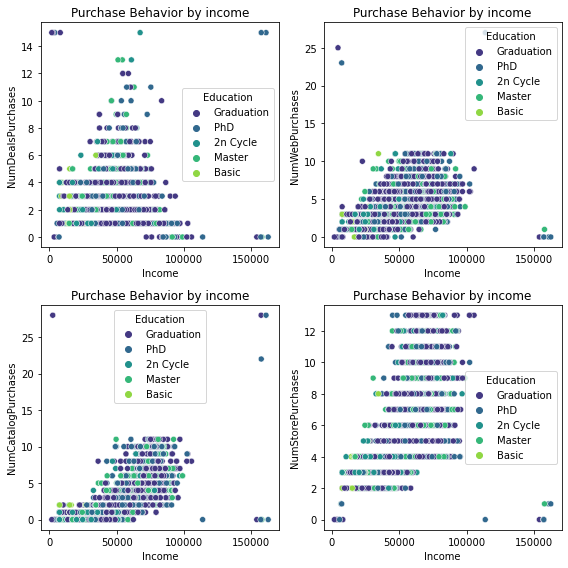

In [27]:
# num purchases columns list
num_purchases_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["Income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["Education"], palette="viridis")
    plt.title("Purchase Behavior by income")

plt.tight_layout()
plt.show()

Scatter plots show linear correlation between income and Catalog, Store and Web purchases. In turn, the relation between income and Deals follows a sort of gaussian distribution, low for both low and high income values and high for medium income values. The effect of `Education` in `Income` is difficult to unrevel with the scatter plots used previously, so further analyisis should be performed in order to understand better its relation.

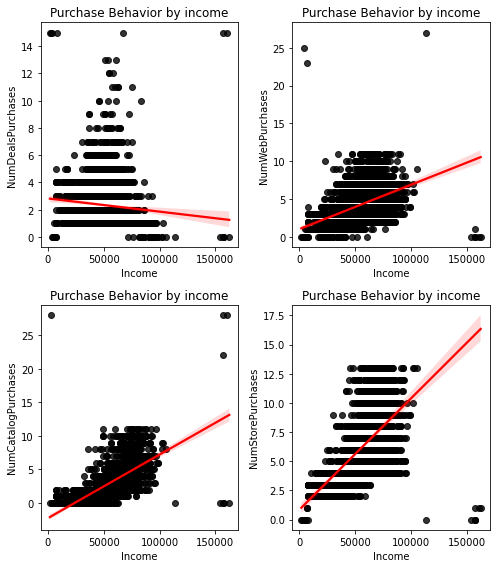

In [30]:
# num purchases columns list
num_purchases_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
# keeps count of plot for subplots
fig = plt.figure(figsize=(7,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=marketing_data["Income"], y= marketing_data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

Line plots confirm a linear correlation of Web, Catalog and Store purchases with `Income`. Interestingly, a weak negative correlation of Deal purchases with income is found. 

Next, scatter and line plots for the relation of total purchases with `Income` is shown below.

In [31]:
#Create column `TotalPurchases`:
marketing_data['TotalPurchases'] = marketing_data['NumDealsPurchases'] + marketing_data['NumWebPurchases'] + marketing_data['NumCatalogPurchases'] + marketing_data['NumStorePurchases']

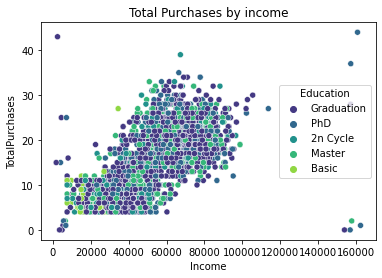

In [35]:
plt.figure()
sns.scatterplot(x=marketing_data["Income"], y= marketing_data['TotalPurchases'], 
                hue=marketing_data["Education"], palette="viridis")
plt.title("Total Purchases by income")
plt.show()

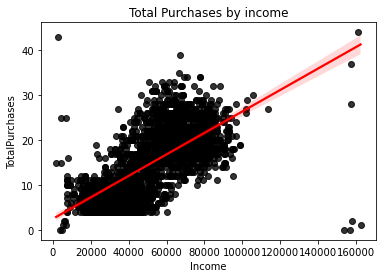

In [36]:
plt.figure()
sns.regplot(x=marketing_data["Income"], y= marketing_data['TotalPurchases'], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Total Purchases by income")
plt.show()

In general, a strong linear relation between `Income` and `TotalPurchases` is obtained by analysing the plots. Still, it is difficult with to understand the relation between `Income` and `Education`.

Following, the relationship bewteen `Income` and each `Mnt{type}Products` variable is shown. The analysis performed is analog to the one previously performed for `Income` and `Num{type}Purchases`.

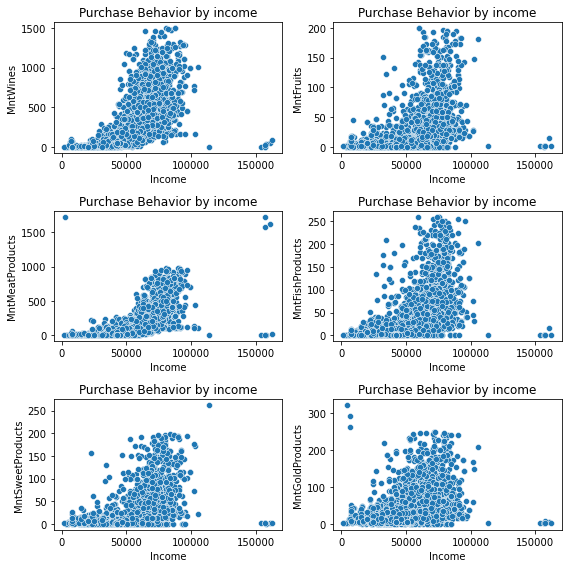

In [38]:
# num purchases columns list
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(amounts_list)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["Income"], y= marketing_data[amounts_list[i]])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

A somewhat linear relation can be extracted from the dependency of `Mnt{type}Products` with `Income`. For further analysis, a *log* scale for both `Mnt{type}Products` and `Income` is considered.

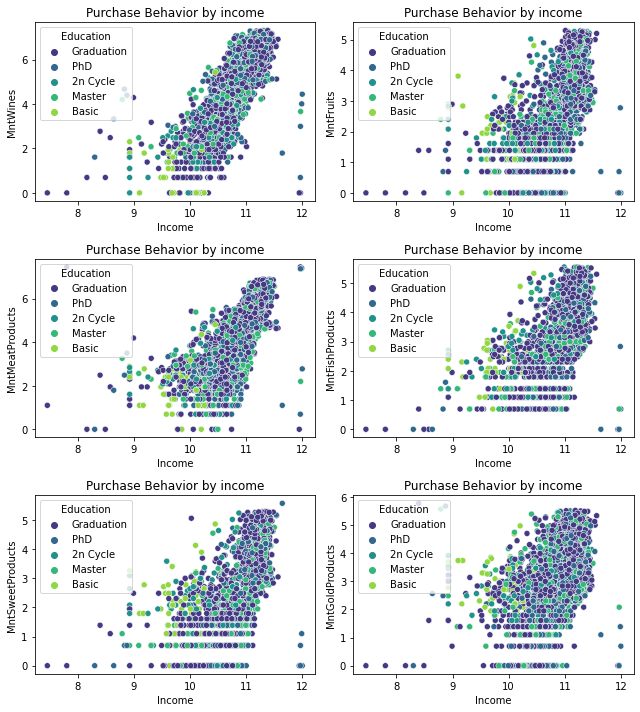

In [43]:
# num purchases columns list
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(9,10))
# loop through number of columns to plot
for i in range(len(amounts_list)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=np.log(marketing_data["Income"]), y= np.log(marketing_data[amounts_list[i]]),
                   hue=marketing_data["Education"], palette="viridis")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

With the *log* scaled variables, it is easy to see there is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.

#### Purchasing Behavior by Education and Income
A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

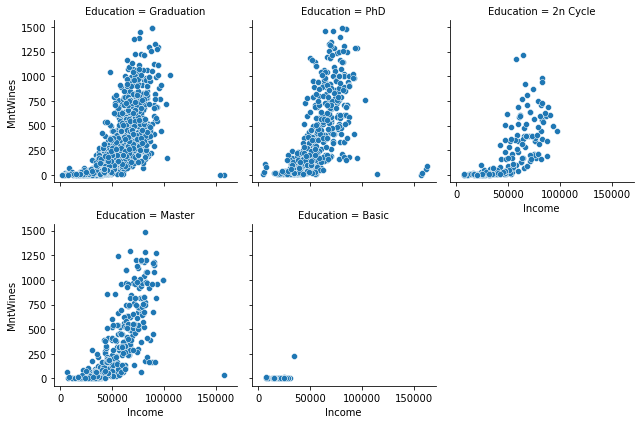

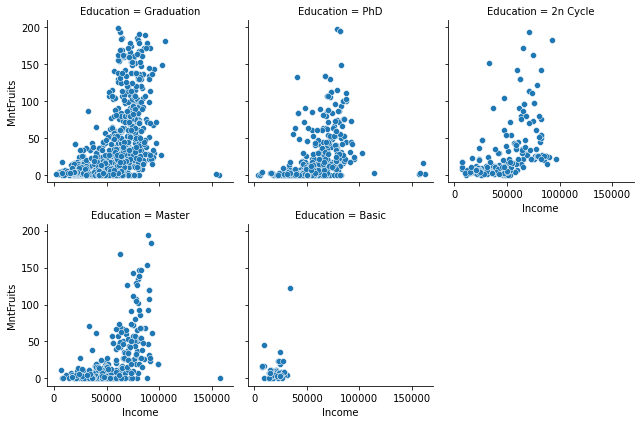

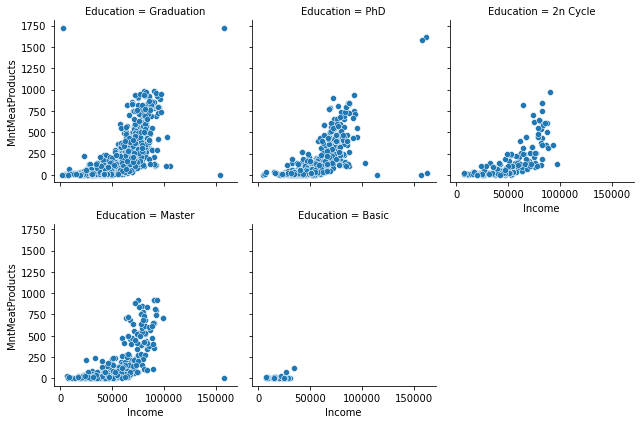

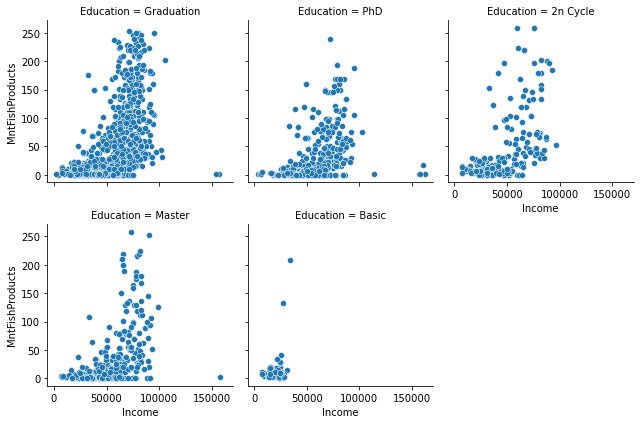

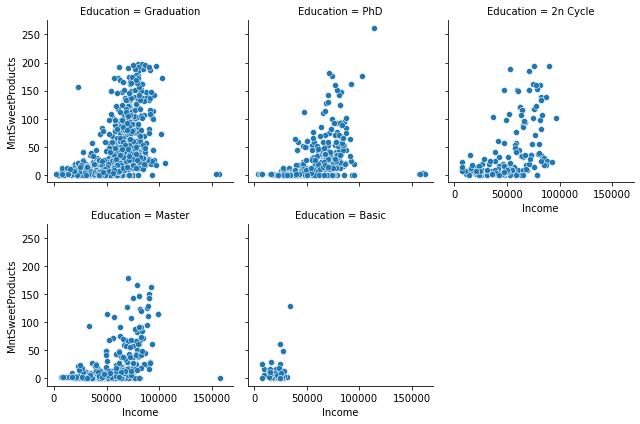

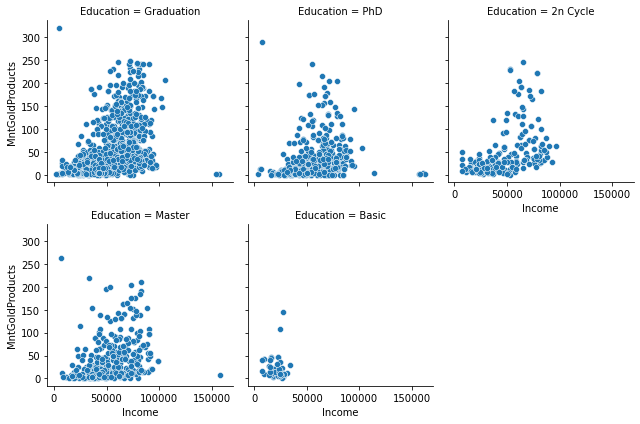

In [44]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="Education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "Income", amounts_list[i])
plt.show()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `Mnt{type}Products`.
* `MntWines` has the strongest positive, linear relationship with `Education` by `Income`.

#### Purchasing Behavior by Age 

The last main variable in our analysis plan is `Age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `Age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `TotalPurchases` vs. `Age`
* `Mnt{type}Pproducts` vs. `Age`
* `Num{type}Purchases` vs. `Age`

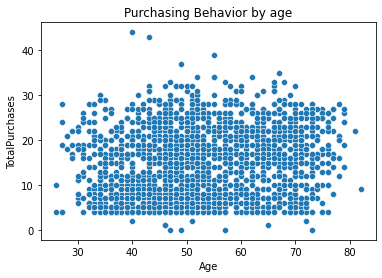

In [48]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=marketing_data["Age"], y=marketing_data["TotalPurchases"])
plt.title("Purchasing Behavior by age")
plt.show()

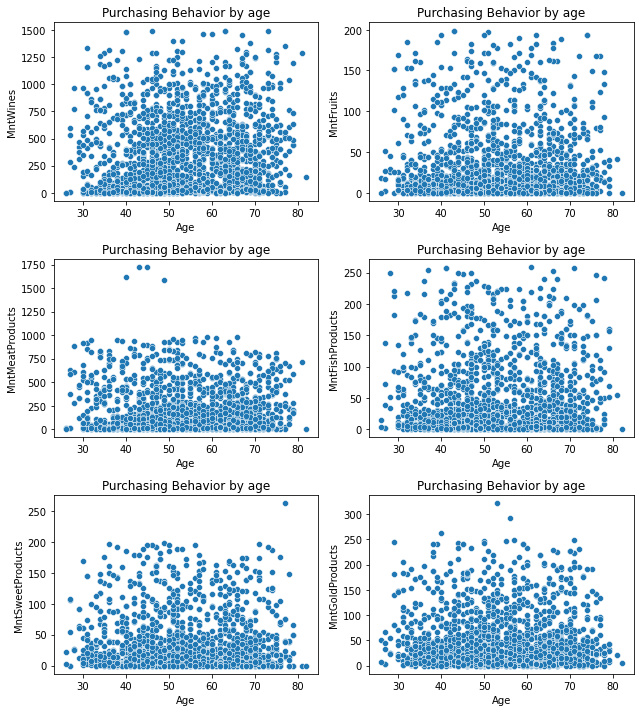

In [49]:
# amounts columns list
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]
plot = 0
fig = plt.figure(figsize=(9,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["Age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

It is still difficult to find any relation between age and purchasing behavior.

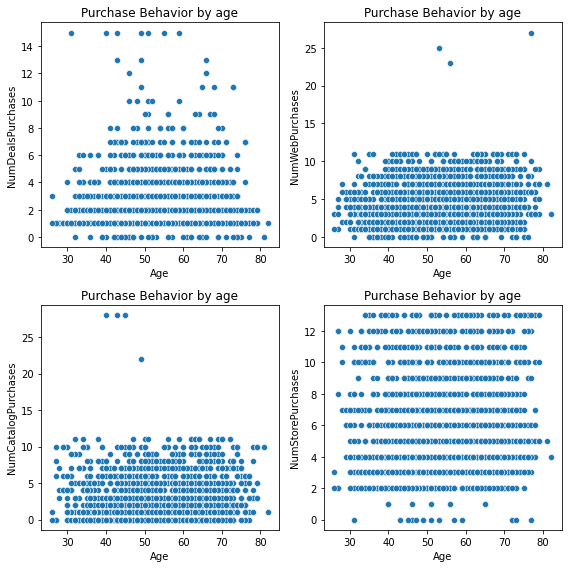

In [50]:
# num purchases columns list
num_purchases_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.scatterplot(x=marketing_data["Age"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show();

It is also difficult to decipher any pattern between `Age` and any `Num{type}Purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `Age` variable.

To do further analysis on the `Age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [52]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['Age'].apply(age_groups)

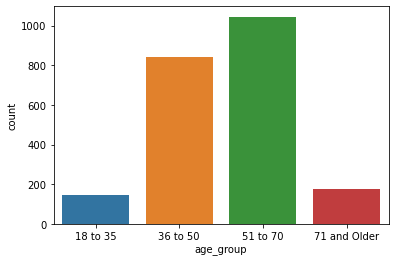

In [53]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(marketing_data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`Age` and `age_group`) and the total purchase amounts each age group buys (`Mnt{type}Products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [55]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
'MntSweetProducts', 'MntGoldProducts')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.Age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


In [56]:
print(age_plus_amounts)

      age_group    Age  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      18 to 35   4735     42256       5049            33477             6680   
1      36 to 50  37312    202869      19599           123281            28328   
2      51 to 70  62351    357309      28147           175138            39807   
3  71 and Older  13029     72862       5446            37574             8464   

   MntSweetProducts  MntGoldProducts  
0              4872             7031  
1             20797            32846  
2             28506            48451  
3              5652             8836  


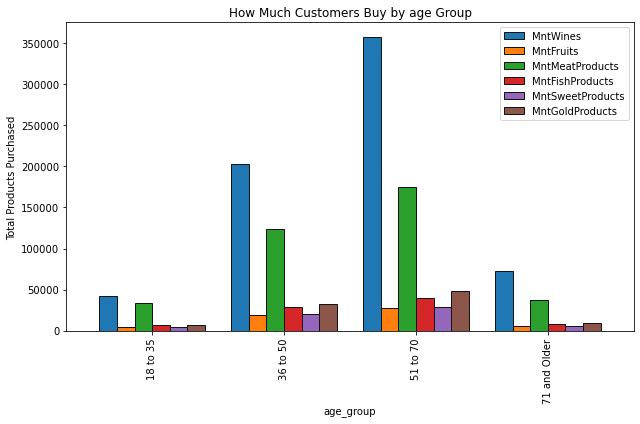

In [57]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'MntWines', 
'MntFruits', 
'MntMeatProducts', 
'MntFishProducts', 
'MntSweetProducts', 
'MntGoldProducts'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

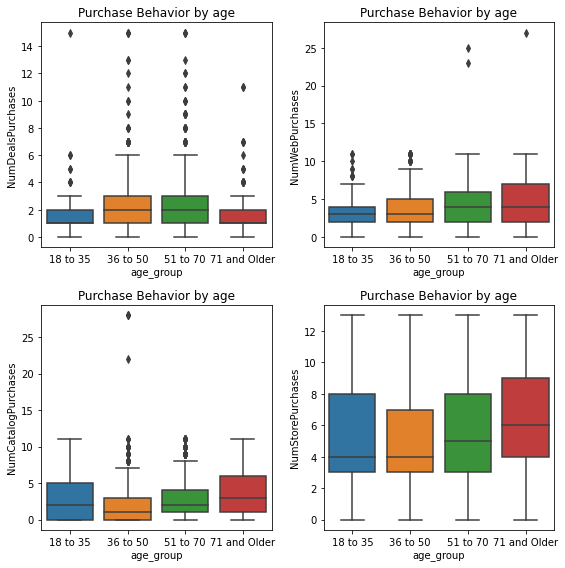

In [58]:
# num purchases columns list
num_purchases_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

### Conclusion 
#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

#### Next Steps

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
* Results from existing marketing campaings
* Geographical data
* Customer marital status
* Customer complaints

